In [28]:
from scipy.fft import fft, fftfreq
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [29]:
# Load the file containing the raw I/Q data in uint8 format (8 bit ADC on the SDR)
dat = np.fromfile("test", dtype="uint8")
# Convert them to normalized float values (-1 to 1)
floats = dat[0::].astype(float)
normalized = (floats[0::] - 127.4) / 256
# convert it to complex numbers (I/Q)
iqdata = dat[0::2] + 1j*dat[1::2]

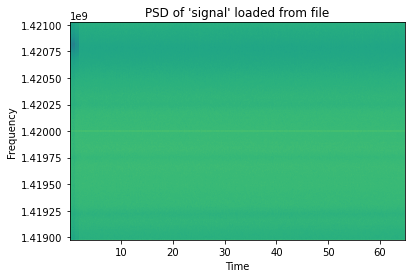

In [30]:
# Plot a spectrogram around center frequency 1420Mhz using dB scale given the original sample rate of 2.048 MSPS and using 4096 samples per FFT
plt.specgram(iqdata, NFFT=4096, Fs=2048000, scale='dB', mode='psd', Fc=1420000000)
plt.title("PSD of 'signal' loaded from file")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()  

In [31]:
# Ignore the DC spike
fftdata = fft(iqdata[1:4096])

In [37]:
# Convert the complex values to the real conjugate (not 100% that's the right term--it returns real + real + imag + imag for each number)
conjdata = np.abs(fftdata)

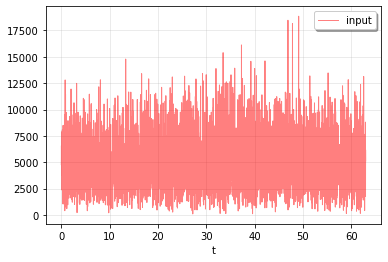

In [38]:
# Set up the linear buckets--not sure if this is necessary
t = np.linspace(0, 63, 4094, endpoint=False)

# Plot the values
plt.plot(t, conjdata[1:], 'r', alpha=0.5, linewidth=1, label='input')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()